## Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

## Reading data from disk

In [2]:
df = pd.read_excel('Dataset/Book1..xlsx')

## Checking DataFrame

In [3]:
df.head(5)

,stations,Date & Period of Survey,PM10,PM2.5,SO2,NO2,AQI
0,Anna Nagar,2019-02-01 00:00:00,106,40.0,11,18,68
1,Anna Nagar,2019-05-07 00:00:00,119,31.0,14,26,63
2,Nungambakkam,2019-04-07 00:00:00,126,35.0,13,29,70
3,Anna Nagar,2019-07-01 00:00:00,94,31.0,13,20,63
4,Nungambakkam,2019-08-01 00:00:00,72,39.0,14,22,63


## Exploratory Data Analaysis

#### Pandas dataframe.info() function is used to get a concise summary of the dataframe.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 7 columns):
stations                   366 non-null object
Date & Period of Survey    365 non-null object
PM10                       366 non-null int64
PM2.5                      312 non-null float64
SO2                        366 non-null int64
NO2                        366 non-null int64
AQI                        366 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 20.1+ KB


#### Pandas describe() is used to view some basic statistical details like percentile, mean, std etc of a data frame or a series of numeric values .

In [5]:
df.describe()

,PM10,PM2.5,SO2,NO2,AQI
count,366.000000,312.000000,366.000000,366.000000,366.000000
mean,114.035519,41.871795,10.568306,20.295082,91.459016
std,34.729978,10.247558,1.983350,2.675168,31.363048
min,11.000000,12.000000,7.000000,1.000000,23.000000
25%,94.000000,35.000000,10.000000,19.000000,68.000000
50%,115.500000,44.500000,11.000000,21.000000,93.000000
75%,135.000000,50.000000,12.000000,22.000000,109.000000
max,231.000000,59.000000,30.000000,29.000000,242.000000


#### DataFrame stores the number of rows and columns as a tuple (number of rows, number of columns) .

In [6]:
df.shape

(366, 7)

## Preprocessing the data

#### Filling NaN using Mean

In [7]:
df = df.fillna(df.mean())  

#### Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form.

In [8]:
from sklearn.preprocessing import LabelEncoder
lbl=LabelEncoder()
df['le_stations'] = lbl.fit_transform(df['stations'])
df.tail()

,stations,Date & Period of Survey,PM10,PM2.5,SO2,NO2,AQI,le_stations
361,t.nagar,13/11/2019,149,41.871795,11,17,67,7
362,Nungambakkam,13/11/2019,143,46.000000,12,21,109,2
363,t.nagar,14/11/2019,117,55.000000,11,21,93,7
364,Nungambakkam,14/11/2019,176,43.000000,12,21,62,2
365,adyar,15/11/2019,117,41.871795,11,16,115,4


#### Droping down Non usage columns 

In [9]:
df= df.drop(['stations','Date & Period of Survey'], axis=1)

In [10]:
df.head()

,PM10,PM2.5,SO2,NO2,AQI,le_stations
0,106,40.0,11,18,68,0
1,119,31.0,14,26,63,0
2,126,35.0,13,29,70,2
3,94,31.0,13,20,63,0
4,72,39.0,14,22,63,2


#### Co relation gives you the measure of the strength of association between two variables.
#### Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation

In [11]:
df.corr()

,PM10,PM2.5,SO2,NO2,AQI,le_stations
PM10,1.000000,0.234791,0.046521,0.012626,-0.088578,0.061144
PM2.5,0.234791,1.000000,0.025253,0.069181,0.009061,0.081860
SO2,0.046521,0.025253,1.000000,0.107209,0.015659,-0.122707
NO2,0.012626,0.069181,0.107209,1.000000,-0.014158,-0.044064
AQI,-0.088578,0.009061,0.015659,-0.014158,1.000000,-0.140083
le_stations,0.061144,0.081860,-0.122707,-0.044064,-0.140083,1.000000


#### A histogram is a representation of the distribution of data. This function groups the values of all given Series in the DataFrame into bins and draws all bins in one matplotlib. axes

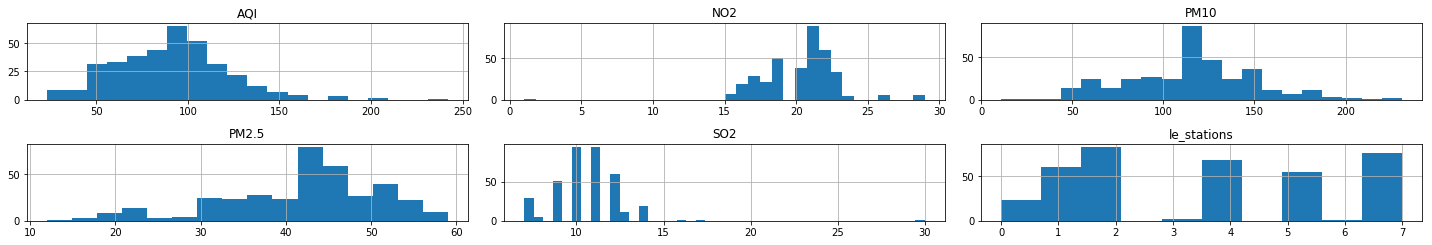

In [12]:
df.hist(figsize = (20, 10), layout=(6, 3), bins = 'auto')
plt.tight_layout()
plt.show()

## Machine Learning Algorthim

### Linear regression - Importing required library

In [13]:
from sklearn.linear_model import LinearRegression

#### For linear regression creating x,y instance

In [14]:
X = df.drop(['AQI'], axis = 1 ) 
y = df.AQI

#### Applying Linear regression , then converting the fit data to dataframe . Traing the data and getting the score

In [15]:
regressor = LinearRegression()  
train_LR = regressor.fit(X,y)
lr_score=train_LR.score(X,y)
print(lr_score)
aqi_Lr= pd.DataFrame(regressor.coef_, X.columns, columns=['aqi_lr'])  
aqi_Lr

0.02816865713902528


,aqi_lr
PM10,-0.081378
PM2.5,0.142629
SO2,0.066068
NO2,-0.264374
le_stations,-1.897334


### Ridge Regression

In [16]:
from sklearn.linear_model import Ridge

In [17]:
param_grid = {'alpha' : [0.2, 0.4, 0.6, 0.8, 1.0, 1.5, 2, 3, 4]}
ridge = Ridge()
grid_search = GridSearchCV(ridge, param_grid=param_grid)
grid_search.fit(X,y)

/home/nandagopal/PycharmProjects/data-science-class/venv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.2, 0.4, 0.6, 0.8, 1.0, 1.5, 2, 3, 4]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [18]:

print(grid_search.best_params_)
print(grid_search.best_estimator_)
print(grid_search.score(X, y))

{'alpha': 4}
Ridge(alpha=4, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)
0.02816856990915184


###  Lasso Regression

In [19]:
from sklearn.linear_model import Lasso

In [20]:

param_grid = {'alpha' : [0.2, 0.4, 0.6, 0.8, 1.0, 1.5, 2, 3, 4], 
             'normalize' : [True, False]}
lasso = Lasso()
grid_search = GridSearchCV(lasso, param_grid=param_grid)
grid_search.fit(X,y)

/home/nandagopal/PycharmProjects/data-science-class/venv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.2, 0.4, 0.6, 0.8, 1.0, 1.5, 2, 3, 4],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [21]:
print(grid_search.best_params_)
print(grid_search.best_estimator_)
print(grid_search.score(X, y))

{'alpha': 0.6, 'normalize': True}
Lasso(alpha=0.6, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)
0.0


In [22]:
### Elastic Net 

In [23]:
from sklearn.linear_model import ElasticNet

In [24]:
elastic_net = ElasticNet()
param_grid = {'alpha' : [0.2, 0.4, 0.6, 0.8, 1.0, 1.5, 2, 3, 4], 
             'normalize' : [True, False],
             'l1_ratio': [0.2, 0.4, 0.6, 0.8]}
grid_search = GridSearchCV(elastic_net, param_grid=param_grid)
grid_search.fit(X,y)

/home/nandagopal/PycharmProjects/data-science-class/venv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.2, 0.4, 0.6, 0.8, 1.0, 1.5, 2, 3, 4],
                         'l1_ratio': [0.2, 0.4, 0.6, 0.8],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [25]:
print(grid_search.best_params_)
print(grid_search.best_estimator_)
print(grid_search.score(X, y))

{'alpha': 0.2, 'l1_ratio': 0.2, 'normalize': True}
ElasticNet(alpha=0.2, copy_X=True, fit_intercept=True, l1_ratio=0.2,
           max_iter=1000, normalize=True, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
0.0007289632262459377


### K Nearest Neighbor

#### Importing K nearest lib

In [26]:
from sklearn.neighbors import KNeighborsRegressor

#### Applying K Nearest Neighbor, setting the nearest range. Traing the data and getting the score

In [27]:
scores= []
k = []
for i in range(2,30):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X,y)
    k_re=knn.score(X,y)
    scores.append(k_re)
    k.append(i)
    #print(k_re)
knn_max_scor = np.max(scores)
print(knn_max_scor)

0.5524559259627588


#### Accuracy for different K Values

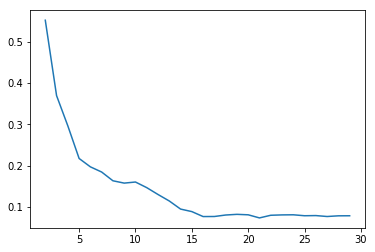

In [28]:
plt.plot(k,scores)

### Decision Tree

#### Importing decision tree lib

In [29]:
from sklearn.tree import DecisionTreeRegressor

#### Applying Decision Tree algorthim. Traing the data and getting the score

In [30]:
dtr = DecisionTreeRegressor()
dtr.fit(X,y)
dt_score = dtr.score(X,y)
print(dt_score)

0.9987410483708283


### Random Forest

#### Applying Random Forest. Traing the data and getting the score

In [31]:
from sklearn.ensemble import RandomForestRegressor

In [32]:
rfr= RandomForestRegressor(n_estimators=10)
rfr.fit(X,y)
rf_score = rfr.score(X,y)
print(rf_score)

0.785055941939879


# Future Time Prediction

In [33]:
df = pd.read_excel('Dataset/Book1..xlsx')
df.head()

,stations,Date & Period of Survey,PM10,PM2.5,SO2,NO2,AQI
0,Anna Nagar,2019-02-01 00:00:00,106,40.0,11,18,68
1,Anna Nagar,2019-05-07 00:00:00,119,31.0,14,26,63
2,Nungambakkam,2019-04-07 00:00:00,126,35.0,13,29,70
3,Anna Nagar,2019-07-01 00:00:00,94,31.0,13,20,63
4,Nungambakkam,2019-08-01 00:00:00,72,39.0,14,22,63


In [34]:
from datetime import datetime as dt
def fix_number_format(x):
    
    try:
        print("ok:", dt.strftime(x, '%Y-%m-%d'))
        return x
    except Exception as err:
        try:
            return dt.strptime(x, '%d/%m/%Y')
        except Exception as err:
            return dt.strptime('25/06/2019', '%d/%m/%Y')
            

In [35]:
df['Date & Period of Survey'] = df['Date & Period of Survey'].apply(lambda x : fix_number_format(x))

ok: 2019-02-01
ok: 2019-05-07
ok: 2019-04-07
ok: 2019-07-01
ok: 2019-08-01
ok: 2019-10-01
ok: 2019-11-01
ok: 2019-01-02
ok: 2019-02-02
ok: 2019-04-02
ok: 2019-05-02
ok: 2019-05-02
ok: 2019-06-02
ok: 2019-06-02
ok: 2019-07-02
ok: 2019-07-02
ok: 2019-08-02
ok: 2019-08-02
ok: 2019-09-02
ok: 2019-09-02
ok: 2019-10-03
ok: 2019-11-02
ok: 2019-12-02
ok: 2019-12-02
ok: 2019-01-03
ok: 2019-08-03
ok: 2019-09-03
ok: 2019-11-03
ok: 2019-12-03
ok: 2019-12-03
ok: 2019-01-04
ok: 2019-02-04
ok: 2019-02-04
ok: 2019-03-04
ok: 2019-03-04
ok: 2019-04-04
ok: 2019-04-04
ok: 2019-05-04
ok: 2019-08-04
ok: 2019-09-04
ok: 2019-09-04
ok: 2019-10-04
ok: 2019-10-04
ok: 2019-11-04
ok: 2019-11-04
ok: 2019-12-04
ok: 2019-12-04
ok: 2019-01-05
ok: 2019-02-05
ok: 2019-03-05
ok: 2019-03-05
ok: 2019-04-05
ok: 2019-06-05
ok: 2019-07-05
ok: 2019-07-05
ok: 2019-08-05
ok: 2019-08-05
ok: 2019-09-05
ok: 2019-09-05
ok: 2019-10-05
ok: 2019-10-05
ok: 2019-11-05
ok: 2019-01-06
ok: 2019-03-06
ok: 2019-04-06
ok: 2019-04-06
ok: 2019-0

In [36]:
df['Date & Period of Survey'] = pd.to_datetime(df['Date & Period of Survey'], format='%Y-%m-%d')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 7 columns):
stations                   366 non-null object
Date & Period of Survey    366 non-null datetime64[ns]
PM10                       366 non-null int64
PM2.5                      312 non-null float64
SO2                        366 non-null int64
NO2                        366 non-null int64
AQI                        366 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 20.1+ KB


In [38]:
df.sort_values(by='Date & Period of Survey')
df = df.set_index('Date & Period of Survey')


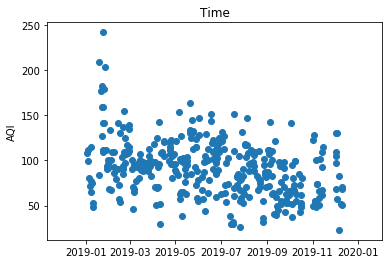

In [39]:
plt.scatter(df['AQI'].index, df['AQI'])
plt.title('Time')
plt.ylabel('AQI');
plt.show()

In [40]:
from statsmodels.tsa.arima_model import ARMA

In [41]:
model = ARMA(df.AQI, order=(0, 1))

/home/nandagopal/PycharmProjects/data-science-class/venv/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [42]:
model_fit = model.fit(disp=False)

In [43]:
yhat = model_fit.predict(len(df.AQI), len(df.AQI) +10 , dynamic=True)

/home/nandagopal/PycharmProjects/data-science-class/venv/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [44]:
yhat

366    106.394843
367     91.483740
368     91.483740
369     91.483740
370     91.483740
371     91.483740
372     91.483740
373     91.483740
374     91.483740
375     91.483740
376     91.483740
dtype: float64